In [1]:
from convert import convert_log_to_csv
convert_log_to_csv()

Log file Tue May  2 16_56_14 2023 uses old format
Log file Wed Apr 26 15_36_59 2023 uses old format
Log file Wed Apr 26 15_37_44 2023 uses old format
Log file Wed Apr 26 15_39_14 2023 uses old format
Log file Wed Apr 26 15_40_03 2023 uses old format
Log file Wed Apr 26 15_41_16 2023 uses old format
Log file Wed Apr 26 15_42_29 2023 uses old format
Log file Wed May  3 14_05_15 2023 uses old format


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

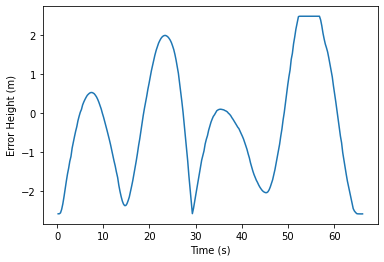

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from convert import convert_log_to_csv
import glob


logs = glob.glob('.\\data\\*-log.csv')
headers = glob.glob('.\\data\\*-header.csv')

# Sort the logs and headers so that they match up
logs.sort()
headers.sort()



#print(files)
# Get filename only
log_file_names = [(x.split('\\')[-1])[:-4] for x in logs]

#columns = ['Time', 'X', 'Y', 'Z', 'Pitch', 'Yaw', 'Roll', 'errorHeight', 'errorRoll', 'errorPitch', 'errorYaw']
# Plot each log file
for i,lg in enumerate(logs):
    # Plot error height against time
    df = pd.read_csv(lg)

    df_header = pd.read_csv(headers[i])
    #print(df)
    #print(log_file_names[i])
    #print(df['Time'])
    df = df.astype(float)
    df_header = df_header.astype(float)
    #print(log_file_names[i])
    #print(df['Time'])
    #exit()

    ref = (float)(df_header['ctrl_h->ref'])
    plt.plot(df['Time'], df['Z'] - ref)
    plt.xlabel('Time (s)')
    plt.ylabel('Error Height (m)')
    
    #ctrl_h->ref, ctrl_h->kp, ctrl_h->tau_i, ctrl_h->tau_d, ctrl_h->alpha
    config = 'kp:' + df_header['ctrl_h->kp'].apply(str) + ' tau_i:' + df_header['ctrl_h->tau_i'].apply(str) + ' tau_d:' + df_header['ctrl_h->tau_d'].apply(str) + ' alpha:' + df_header['ctrl_h->alpha'].apply(str)
    #print(config.astype(str).to_string())
    plt.title(config.astype(str).to_string())
    #plt.show()
    plt.savefig('.\\plots\\'+ log_file_names[i] + '-Height.png')

    # clear the plot
    plt.clf()


#df = pd.read_csv('./Wed-May-3-14_29_37-2023.csv', names=columns)

# Plot errorHeight against time
#plt.plot(df['Time'], df['errorHeight'])
#plt.xlabel('Time (s)')
#plt.ylabel('Error Height (m)')
#plt.title('Error Height vs Time')
#plt.show()